# **Student Performance Prediction Using Machine Learning Algorithms**

**Step 1: Import necessary libraries**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, auc

**Step 2: Load the dataset**

In [23]:
data =pd.read_csv('student_performance_prediction.csv')
data.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


**Step 3: Handle missing values and encode categorical data**

In [24]:
# Fill missing values with the mean or median for numerical columns
data['Attendance Rate'].fillna(data['Attendance Rate'].mean(), inplace=True)
data['Passed']=data['Passed'].fillna(data['Passed'].mode()[0])
# Convert categorical columns to numeric
le = LabelEncoder()
data['Participation in Extracurricular Activities'] = le.fit_transform(data['Participation in Extracurricular Activities'])
data['Parent Education Level'] = le.fit_transform(data['Parent Education Level'])
data['Passed'] = le.fit_transform(data['Passed'])  # Yes=1, No=0

# Drop 'Student ID'
data.drop(columns=['Student ID'], inplace=True)


<ipython-input-24-65c8924970e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Attendance Rate'].fillna(data['Attendance Rate'].mean(), inplace=True)


In [25]:
data.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.276323,75.0,1,4,1
1,9.3,95.300000,60.6,0,3,0
2,13.2,75.276323,64.0,0,0,0
3,17.6,76.800000,62.4,1,1,0
4,8.8,89.300000,72.7,0,4,0


**Step 4: Separate features (X) and target variable (y)**

In [26]:
X = data.drop(columns=['Passed'])  # Features
y = data['Passed']  # Target


**Step 5: Split the dataset into training and testing sets**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


**Step 6: Handling missing values and preparing the data for training**

In [39]:
# Assuming 'data' is your DataFrame
# Create an imputer to replace NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

**Step 7: Model training**

In [40]:
# Now you can proceed with model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Step 8: Model prediction and evaluation**

In [41]:
# Predict the target variable (Passed) using the test data
y_pred = model.predict(X_test)

**Step 9: Calculate accuracy**

In [42]:
# Compare the predicted values (y_pred) with the actual values (y_test) to compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 52.59%


**Step 10: Confusion Matrix & Classification report**

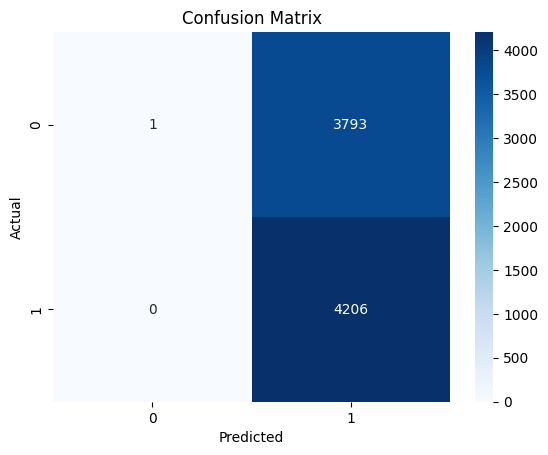

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3794
           1       0.53      1.00      0.69      4206

    accuracy                           0.53      8000
   macro avg       0.76      0.50      0.34      8000
weighted avg       0.75      0.53      0.36      8000



In [43]:
# Create a confusion matrix to analyze the performance of the classification model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # annot=True to show values, fmt='d' to format numbers
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

**Step 11: User Input for Prediction**

In [44]:
def predict_passed(model):
    # Gather input from the user
    study_hours = float(input("Enter Study Hours per Week: "))
    attendance_rate = float(input("Enter Attendance Rate (%): "))
    previous_grades = float(input("Enter Previous Grades (%): "))
    extracurricular = input("Participation in Extracurricular Activities (Yes/No): ")
    parent_education = input("Parent Education Level (High School/Associate/Bachelor/Master): ")

    # Convert categorical inputs to numeric (using the same encodings as during preprocessing)
    extracurricular_encoded = 1 if extracurricular.lower() == "yes" else 0
    parent_education_levels = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3}
    parent_education_encoded = parent_education_levels.get(parent_education, 0)  # Default to 'High School' if not found

    # Create a DataFrame with the input
    input_data = pd.DataFrame({
        'Study Hours per Week': [study_hours],
        'Attendance Rate': [attendance_rate],
        'Previous Grades': [previous_grades],
        'Participation in Extracurricular Activities': [extracurricular_encoded],
        'Parent Education Level': [parent_education_encoded]
    })

    # Use the trained model to make a prediction
    prediction = model.predict(input_data)

    # Output result
    if prediction[0] == 1:
        print("Prediction: The student is likely to PASS.")
    else:
        print("Prediction: The student is likely to FAIL.")

In [34]:
# Assuming 'model' is your trained LogisticRegression model
predict_passed(model)

Enter Study Hours per Week: 30
Enter Attendance Rate (%): 70
Enter Previous Grades (%): 78
Participation in Extracurricular Activities (Yes/No): Yes
Parent Education Level (High School/Associate/Bachelor/Master): High School
Prediction: The student is likely to PASS.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**Step 12: Visualizing Study Hours vs Previous Grades**

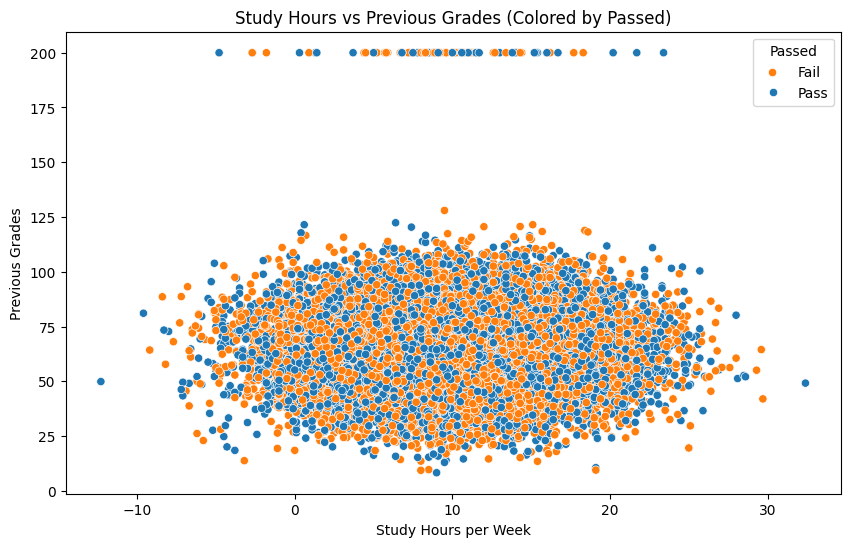

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours per Week', y='Previous Grades', hue='Passed', data=data)
plt.title('Study Hours vs Previous Grades (Colored by Passed)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Previous Grades')
plt.legend(title='Passed', labels=['Fail', 'Pass'])  # Customizing legend
plt.show()


**Step 13: Visualizing Attendance Rate Distribution by Pass/Fail Status**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


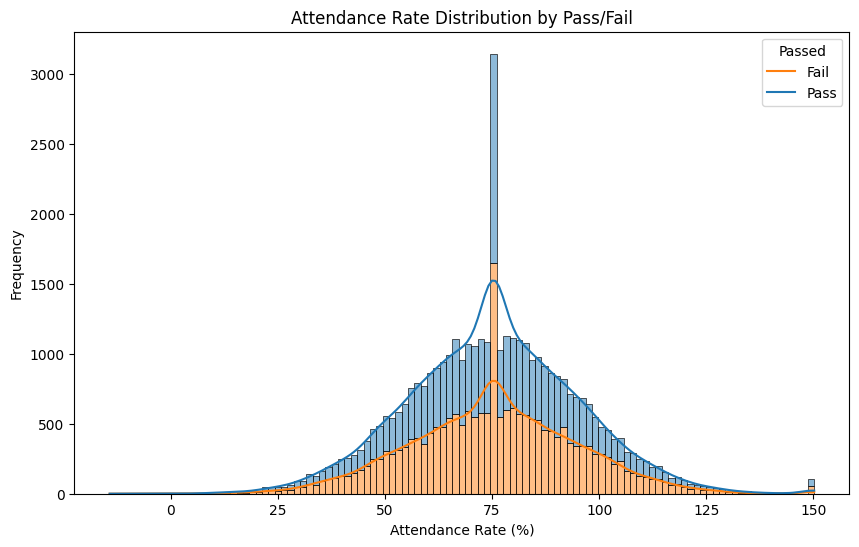

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Attendance Rate', hue='Passed', multiple='stack', kde=True)
plt.title('Attendance Rate Distribution by Pass/Fail')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Frequency')
plt.legend(title='Passed', labels=['Fail', 'Pass'])  # Customizing legend
plt.show()


Step 14: Evaluating Model Performance with ROC Curve

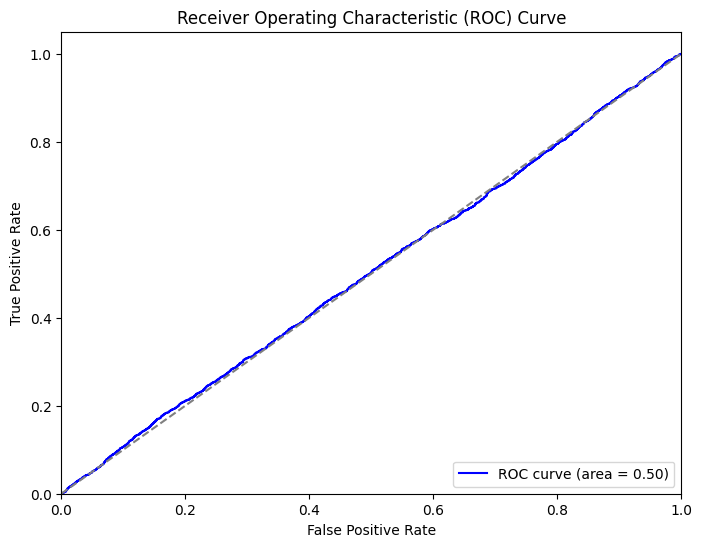

In [37]:
# Predict probabilities for the positive class (Pass)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()